In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## Add Noise

In [2]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [4]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          image: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """
    salt_prob = 0.01
    pepper_prob = 0.01
    random_matrix = np.random.rand(*img.shape[:2])
    img[random_matrix < salt_prob] = 255
    img[random_matrix > 1 - pepper_prob] = 0

    return img

(-0.5, 374.5, 499.5, -0.5)

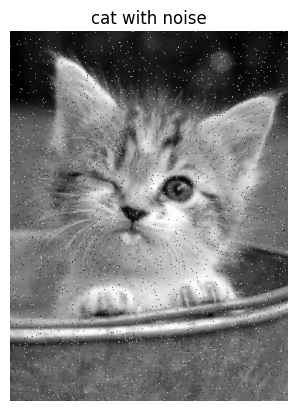

In [5]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# Smoothing Filters

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [9]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  pad_size = filter_size // 2

  top = img[1:pad_size+1][::-1]
  bottom = img[-(pad_size+1):-1][::-1]
  left = img[:, 1:pad_size+1][:, ::-1]
  right = img[:, -(pad_size+1):-1][:, ::-1]

  top_left = top[:, 1:pad_size+1][:, ::-1]
  top_right = top[:, -(pad_size+1):-1][:, ::-1]
  bottom_left = bottom[:, 1:pad_size+1][:, ::-1]
  bottom_right = bottom[:, -(pad_size+1):-1][:, ::-1]

  image = np.block([
        [top_left, top, top_right],
        [left, img, right],
        [bottom_left, bottom, bottom_right]
    ])

  return image

In [10]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  height = len(img)
  width = len(img[0])

  for i in range(height):
    for j in range(width):
      sub_matrix = [image[i + x][j:j + filter_size] for x in range(filter_size)]

      flat_list = [item for sublist in sub_matrix for item in sublist]
      result[i][j] = sum(flat_list) // len(flat_list)

  return result

In [11]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  height = len(img)
  width = len(img[0])

  for i in range(height):
    for j in range(width):
      sub_matrix = [image[i + x][j:j + filter_size] for x in range(filter_size)]

      flat_list = [item for sublist in sub_matrix for item in sublist]
      flat_list.sort()

      mid = len(flat_list) // 2
      if len(flat_list) % 2 == 0:
        median = (flat_list[mid - 1] + flat_list[mid]) // 2
      else:
        median = flat_list[mid]

      result[i][j] = median

  return result

In [14]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    image = Reflect101(img, filter_size)
    kernel = np.zeros((filter_size,filter_size))

    center = filter_size // 2
    sum_val = 0  # To normalize the kernel

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - center
            y = j - center
            kernel[i , j] = (1 / (2 * math.pi * std ** 2)) * math.exp(-(x ** 2 + y ** 2) / (2 * std ** 2))
            sum_val += kernel[i , j]

    kernel /= sum_val
    output = image.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 388.5, 513.5, -0.5)

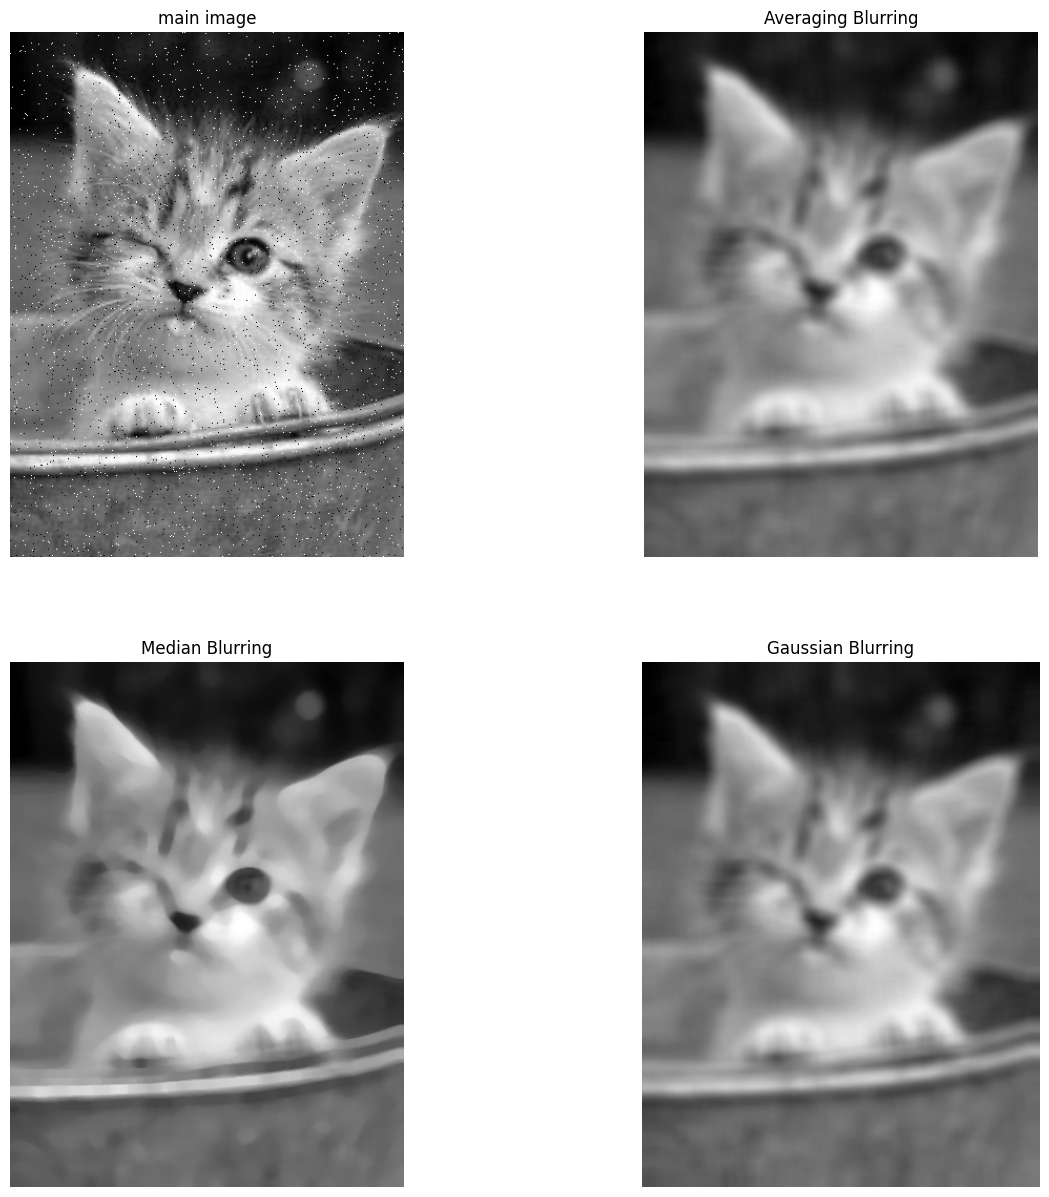

In [15]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


<h3> in this section we want to implement all blurrings with opencv and compare their with last part </h3>
<h3><b> note : for comparison, the parameters should be the same as in last part </b></h3>

In [16]:
AveragingBlurring = cv2.blur(image , (15 , 15))
MedianBlurring = cv2.medianBlur(image , 15)
GaussianBlurring = cv2.GaussianBlur(image , (15 , 15) , 40)

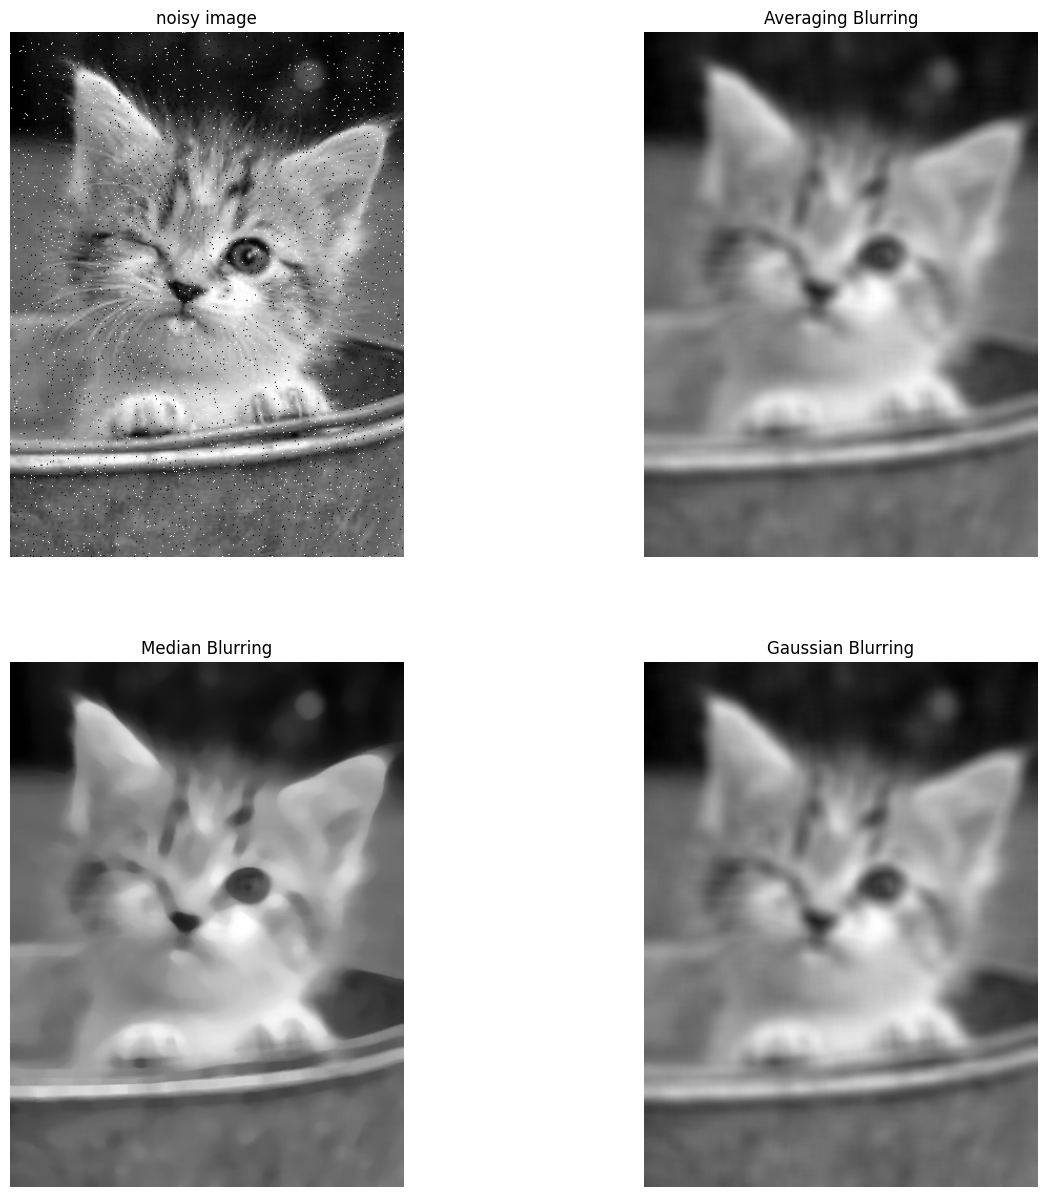

In [17]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")